<a href="https://colab.research.google.com/github/anisbagwan/NETFLIX-MOVIES-and-TV-shows-clusteringG/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
# Importing important Libraries

import pandas as pd                     # To bring data analysis tools and libraries
import numpy as np                      # To perform numerical/mathematical operation on array
import matplotlib.pyplot as plt         # For plotting data
import seaborn as sns                   # For statistical graphics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount the google drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [159]:
# Importing the dataset

df = pd.read_csv(r'/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [160]:
# Display top 5 rows 

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [161]:
# Display bottom 5 rows 

df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [162]:
# Display shape of data
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

#Display column names
print(f'Our dataset has following columns -\n {list(df.columns)}')

Our dataset has 7787 rows and 12 columns.
Our dataset has following columns -
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [163]:
# Display information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [164]:
# Display statistical data of all columns with numerical values
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [165]:
# Display number of unique values for each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [166]:
 # Display null values numbers in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [167]:
df=df.dropna(subset=['date_added'])

In [168]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2379
cast             718
country          506
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [169]:
#Remove all the missing values
df.fillna("No data",inplace=True)

In [170]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Five columns have some missing values. Since all these five columns consists of text data, it is really hard to impute those values. Therefore, it's better to replace all the missing values.


In [171]:
# Checking for duplicates
check_dupl = df.duplicated(keep = False).any()
if check_dupl == False:
    print('There are no duplicate rows in our data')
else:
    print ('There are duplicate rows in our data')

There are no duplicate rows in our data


"data_added" is in "YYYY-MM-DD" format.
Since "release_year" is in "YYYY" format, it would look better to equalize the formats.

In [172]:
df["date_added"]=pd.to_datetime(df["date_added"])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.9+ KB


In [174]:
df["date_added"] = df["date_added"].dt.year

df["date_added"] = df["date_added"].astype(int)


In [185]:
df['year_added']=df['date_added']
df.drop('date_added',axis=1)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,No data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019
7784,s7785,Movie,Zulu Man in Japan,No data,Nasty C,No data,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020
7785,s7786,TV Show,Zumbo's Just Desserts,No data,"Adriano Zumbo, Rachel Khoo",Australia,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020


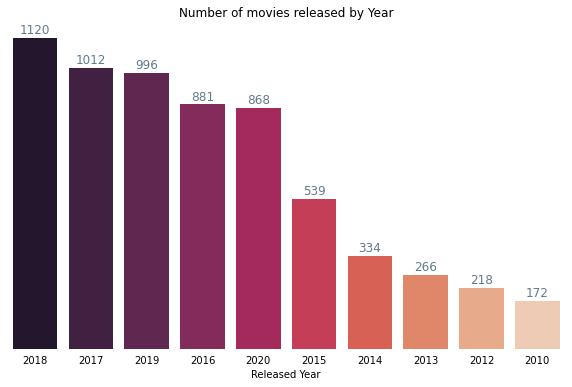

In [186]:
# Let's check the total count of each class
plt.figure(figsize=(10,6))


# Plotting the values in dependent variable
ax=sns.countplot(x="release_year", data=df,
              order = df['release_year'].value_counts().index[:10],
              palette="rocket")

#Anotate the bars with their values
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Released Year", ylabel = "")
plt.title('Number of movies released by Year')


plt.show()

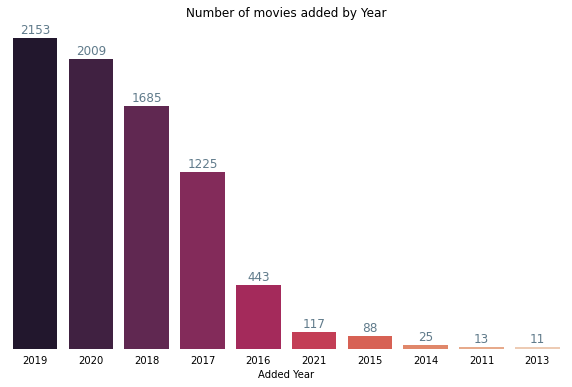

In [188]:
# Let's check the total count of each class
plt.figure(figsize=(10,6))


# Plotting the values in dependent variable
ax=sns.countplot(x="year_added", data=df,
              order = df['year_added'].value_counts().index[:10],
              palette="rocket")

# Anotate the bars with their values
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Added Year", ylabel = "")
plt.title('Number of movies added by Year')


plt.show()

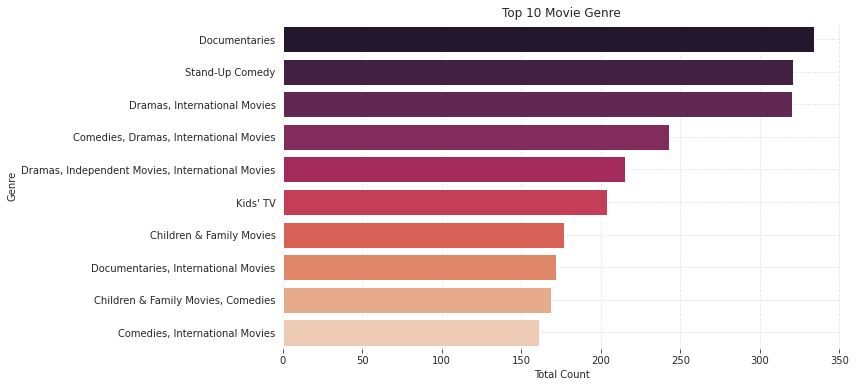

In [215]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.countplot(y="listed_in", data=df,order = df['listed_in'].value_counts().index[:10],
              palette="rocket")

# Removing all ticks and label
plt.tick_params(top=False, bottom=True, left=False, right=False, 
                labelleft=True, labelbottom=True)


# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.xlabel('Total Count')
plt.ylabel("Genre")
plt.title('Top 10 Movie Genre')

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.9)
plt.show()